# Make my a Playlist: Fun with Spotify and Echonest APIs

https://developer.spotify.com/documentation/web-api/reference/

## Get set-up

In [1]:
import pip_magic
from main import PlaylistMaker
from IPython.display import Image, display, HTML
import math
import toolz
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Note: pip_magic does not work with pip v10. I used pip v9.0.3
%pip install spotipy

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Helper Functions

In [76]:
playlist = PlaylistMaker()

In [ ]:
def image_grid(images, rows=1, height=200, width=200):
    images_as_html = '<table>'
    images_per_row = math.ceil(len(images) / rows)
    for r in range(rows):
        images_this_row = images[r*images_per_row : r*images_per_row+images_per_row]
        if images_this_row:
            images_as_html += '<tr>'
            for img in images_this_row:
                images_as_html += f"<td><img src='{img}' height='{height}' width='{width}''></td>"
            images_as_html += '</tr>'
    images_as_html += '</table>'
    display(HTML(images_as_html))

## Get some spotify details on a list of artists...

In [ ]:
artists = ['David Ramirez', 'Jeffrey Foucault', 'Johnny Cash', 'Ryan Adams']
artist_deets = playlist.artist_details(artists).set_index('Artist Name')

### Who has the most Spotify followers?

In [ ]:
most_followers = artist_deets.sort_values('Artist Followers',ascending=False)['Artist Followers'][:1].to_dict()
artist_, followers_ = list(most_followers.items())[0]
print(f'Out of {", ".join(artists)}...')
print(f'{artist_} has the most followers with {followers_:,}.')

### Give me some related artists...

In [ ]:
related_artists = (playlist.find_related_artists(playlist.artist_details(artists), 3)
                   .set_index('Artist Name')
                   .sort_values('Artist Followers', ascending=False))
print('Here are the top 3 related artists for each of your artists:')
display(related_artists[['Artist Followers', 'Artist Popularity']])
imgs = [related_artists.at[a, 'Artist Image'] for a in related_artists.index]
image_grid(imgs,3,300,300);

### What are the common genres?

In [ ]:
genres = list(related_artists['Artist Genres'])
genres = sum(genres, []) # slick way to flatten list
genres_occurance = toolz.frequencies(genres)
print(f'Out of the {len(related_artists)} related artists, here are the most common genres:')
for g, v in pd.Series(genres_occurance).sort_values(ascending=False)[:15].iteritems():
    print(f'   {g} ({v})')

## Let's look at the tracks for a single artist...

In [41]:
artist = 'The Beatles'
artist_tracks = playlist.get_artist_tracks(artist)
artist_tracks = playlist.add_audio_features(artist_tracks)
print(f'{len(artist_tracks)} tracks from {artist}.')
artist_tracks['Release Date'] = pd.to_datetime(artist_tracks['Release Date'])
artist_tracks = artist_tracks.set_index('Track Name').sort_values('Track Popularity',ascending=False)
artist_tracks[:5]

268 tracks from The Beatles.


,Album ID,Album Name,Artist,Release Date,Track ID,Track Popularity,Acousticness,Danceability,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Major/Minor,Speechiness,Time Signature,Valence
Track Name,,,,,,,,,,,,,,,,,,
Here Comes The Sun - Remastered,0ETFjACtuP2ADo6LFhL6HN,Abbey Road (Remastered),The Beatles,1969-09-26,6dGnYIeXmHdcikdzNNDMm2,75,0.0339,0.557,3.095550,0.540,0.002480,9,0.1790,-10.484,1,0.0347,4,0.394
Come Together - Remastered,0ETFjACtuP2ADo6LFhL6HN,Abbey Road (Remastered),The Beatles,1969-09-26,2EqlS6tkEnglzr7tkKAAYD,71,0.0302,0.533,4.332450,0.376,0.248000,9,0.0926,-11.913,0,0.0393,4,0.187
Hey Jude - Remastered 2015,7vEJAtP3KgKSpOHVgwm3Eh,1 (Remastered),The Beatles,2000-11-13,0aym2LBJBk9DAYuHHutrIl,69,0.0112,0.386,7.094217,0.607,0.000014,10,0.0880,-7.700,1,0.0261,4,0.532
Let It Be - Remastered,0jTGHV5xqHPvEcwL8f6YU5,Let It Be (Remastered),The Beatles,1970-05-08,7iN1s7xHE4ifF5povM6A48,69,0.6310,0.443,4.050450,0.403,0.000000,0,0.1110,-8.339,1,0.0322,4,0.410
Twist And Shout - Remastered,3KzAvEXcqJKBF97HrXwlgf,Please Please Me (Remastered),The Beatles,1963-03-22,5ZBeML7Lf3FMEVviTyvi8l,68,0.6410,0.482,2.587117,0.849,0.000008,2,0.0414,-9.198,1,0.0452,4,0.937


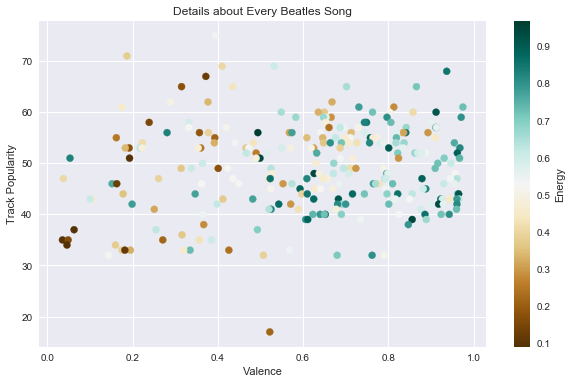

In [72]:
x_var, y_var, c_var = ('Valence', 'Track Popularity', 'Energy')

f, ax = plt.subplots(figsize=(10,6))
x=artist_tracks[x_var]
y=artist_tracks[y_var]
c=artist_tracks[c_var]
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_title('Details about Every Beatles Song')

points = ax.scatter(x, y, c=c, s=50, cmap='BrBG')
f.colorbar(points, label=c_var)

In [45]:
artist_tracks_grouped = artist_tracks.groupby('Album Name').mean().sort_values('Track Popularity', ascending=False)
artist_tracks_grouped

,Track Popularity,Acousticness,Danceability,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Major/Minor,Speechiness,Time Signature,Valence
Album Name,,,,,,,,,,,,,
1 (Remastered),55.666667,0.276102,0.526815,2.933226,0.662333,1.930301e-02,4.037037,0.205644,-6.911593,0.814815,0.037404,4.000000,0.681741
Abbey Road (Remastered),55.058824,0.224964,0.518000,2.793830,0.457176,1.228023e-01,3.588235,0.177718,-11.344412,0.705882,0.047312,3.647059,0.459176
Sgt. Pepper's Lonely Hearts Club Band (Remastered),54.384615,0.298762,0.515385,3.070822,0.482538,4.551862e-02,2.923077,0.381269,-9.939692,0.769231,0.050223,3.615385,0.628385
Rubber Soul (Remastered),53.500000,0.150806,0.587786,2.538490,0.539357,9.021500e-05,4.285714,0.102893,-10.389500,0.785714,0.043543,3.928571,0.716357
Magical Mystery Tour (Remastered),53.090909,0.311273,0.466909,3.322467,0.486545,8.340127e-02,4.363636,0.178882,-10.410727,0.909091,0.053691,4.000000,0.473618
Revolver (Remastered),52.714286,0.406135,0.482429,2.483285,0.530571,2.600773e-02,4.928571,0.254457,-8.736286,0.785714,0.039271,3.928571,0.626171
Let It Be (Remastered),51.666667,0.364050,0.520417,2.931075,0.545917,5.590117e-03,4.000000,0.303842,-9.830833,0.750000,0.066733,3.833333,0.614667
The Beatles (Remastered),50.700000,0.395290,0.502567,3.123126,0.503810,1.539510e-01,5.733333,0.267787,-11.117333,0.800000,0.059757,3.900000,0.563133
Help! (Remastered),50.642857,0.295386,0.528000,2.422652,0.610929,3.178571e-04,6.428571,0.156086,-8.258571,0.928571,0.038400,3.785714,0.726714


ValueError: Invalid RGBA argument: '1 (Remastered)'

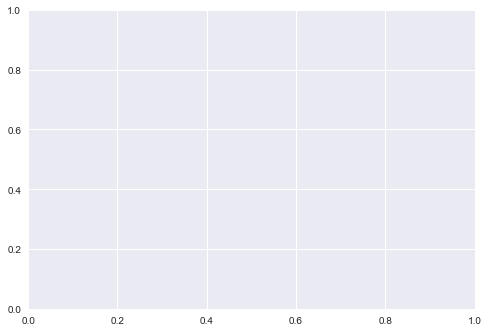

In [61]:


# # use plt.cm.get_cmap(cmap, N) to get an N-bin version of cmap
# x=artist_tracks_grouped['Acousticness']
# y=[1] * len(artist_tracks_grouped)
# c=list(range(len(artist_tracks_grouped)))
# plt.scatter(x, y, c=artist_tracks_grouped.index, cmap=plt.cm.get_cmap('Greens'))#, len(artist_tracks_grouped)))

# # This function formatter will replace integers with target names
# formatter = plt.FuncFormatter(lambda val, loc: artist_tracks_grouped.index[val])

# # We must be sure to specify the ticks matching our target names
# plt.colorbar(ticks=list(len(artist_tracks_grouped)), format=formatter);

# # Set the clim so that labels are centered on each block
# # plt.clim(-0.5, 2.5)

In [77]:
tracks = playlist.track_details_from_playlist('Special Earth Songs from Tennessee')
plylst_tracks = playlist.add_audio_features(tracks)
plylst_tracks[:3]

,Artist,Track ID,Track Name,Track Popularity,Acousticness,Danceability,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Major/Minor,Speechiness,Time Signature,Valence
0,Gregory Alan Isakov,3Kj2EWpIBnvETsYq4cq0IH,Big Black Car,67,0.897,0.572,3.624450,0.183,0.00275,3,0.103,-16.069,1,0.0323,4,0.404
1,Gregory Alan Isakov,3G9ETaH55bMQx8hwNhAgbU,The Stable Song,65,0.633,0.625,6.015550,0.432,0.00242,2,0.127,-11.948,1,0.0283,4,0.361
2,Gregory Alan Isakov,7iQmjnDXYngWGsbjVnDc1U,Amsterdam,58,0.921,0.554,3.310667,0.429,0.13300,3,0.115,-12.510,1,0.0283,3,0.533


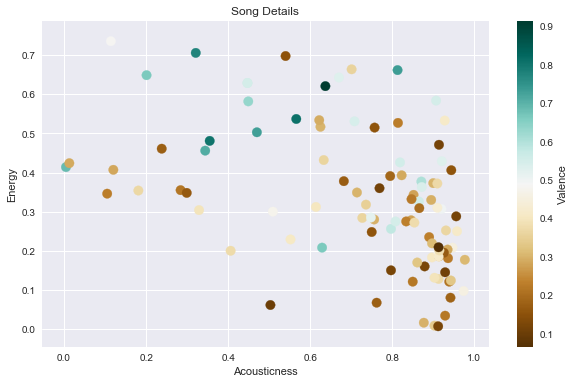

In [82]:
x_var, y_var, c_var = ('Acousticness', 'Energy', 'Valence')

f, ax = plt.subplots(figsize=(10,6))
x=plylst_tracks[x_var]
y=plylst_tracks[y_var]
c=plylst_tracks[c_var]
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_title('Playlist Song Details')

points = ax.scatter(x, y, c=c, s=90, cmap='BrBG')
f.colorbar(points, label=c_var)

In [ ]:
tracks = playlist.track_details_from_playlist('Special Earth Songs from Tennessee')
plylst_tracks = playlist.add_audio_features(tracks)
plylst_tracks[:3]

In [ ]:
x_var, y_var, c_var = ('Acousticness', 'Energy', 'Valence')

f, ax = plt.subplots(figsize=(10,6))
x=plylst_tracks[x_var]
y=plylst_tracks[y_var]
c=plylst_tracks[c_var]
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_title('Playlist Song Details')

points = ax.scatter(x, y, c=c, s=90, cmap='BrBG')
f.colorbar(points, label=c_var)

In [85]:
artists = ['David Ramirez', 'Jeffrey Foucault', 'Johnny Cash', 'Ryan Adams']
tracks = playlist.create_track_list_of_related_artists(artists, include_seed_artists=True,
                                                       num_top_tracks_per_artist=5,
                                                       num_related_artists=8)
tracks = playlist.add_audio_features(tracks)
plylst_tracks = tracks.sort_values('Track Popularity',ascending=False)
print(f'Based on the {len(artists)} seed artists, a playlist of {len(plylst_tracks)} songs was created.')
plylst_tracks.head(10)

Based on the 4 seed artists, a playlist of 160 songs was created.


,Artist Followers,Artist Genres,Artist ID,Artist Image,Artist Name,Artist Popularity,Track ID,Track Name,Track Popularity,Acousticness,...,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Major/Minor,Speechiness,Time Signature,Valence
90,156111.0,"[country rock, cowboy western, folk, folk rock...",0vYQRW5LIDeYQOccTviQNX,https://i.scdn.co/image/c89f4c57259c307731fe2b...,Kris Kristofferson,56.0,6uvT4Di9ZRBw5cbexZJDts,Highwayman,62.0,0.541000,...,3.049550,0.448,0.013500,11.0,0.1260,-13.175,0.0,0.0389,4.0,0.441
80,102103.0,"[country gospel, cowboy western, nashville sou...",0Xi59sEw38vRvwleSAVqoo,https://i.scdn.co/image/55992126e2a79d6dad67c4...,Marty Robbins,58.0,0AQquaENerGps8BQmbPw14,Big Iron,62.0,0.803000,...,3.928883,0.474,0.000000,1.0,0.2580,-7.834,0.0,0.0491,4.0,0.570
100,288658.0,"[country gospel, cowboy western, nashville sou...",1FClsNYBUoNFtGgzeG74dW,https://i.scdn.co/image/5fc12e434b15c08796c715...,Hank Williams,59.0,6uzAorm9rlMshQ9rjKviNl,Lovesick Blues - Show 9,61.0,0.959000,...,2.870450,0.350,0.000000,0.0,0.6050,-8.079,1.0,0.0405,4.0,0.680
15,26995.0,"[alternative country, chamber pop, deep new am...",37eqxl8DyLd5sQN54wYJbE,https://i.scdn.co/image/d2ec485422f952c58c2464...,Hiss Golden Messenger,57.0,7cgka1GOkbcvNqQYrs2FwE,"Caledonia, My Love",61.0,0.842000,...,3.006217,0.144,0.000281,5.0,0.0953,-16.868,1.0,0.0474,3.0,0.198
10,41559.0,"[deep new americana, folk-pop, indie folk, ind...",251UrhgNbMr15NLzQ2KyKq,https://i.scdn.co/image/0eecfd5de2087f1a2e9dfa...,Rayland Baxter,58.0,0HNhfGGE2n702ieqFxQV5M,Olivia,61.0,0.685000,...,3.894883,0.551,0.000029,7.0,0.0889,-9.440,1.0,0.0321,4.0,0.698
115,170724.0,"[country, country gospel, country rock, nashvi...",2sxmKe3CUrWnx7eoXMhOlW,https://i.scdn.co/image/b6a79a14b8a986f6348e8d...,Dwight Yoakam,60.0,6FevJcaJvt5EvsHnuJHBnb,Fast As You,61.0,0.000479,...,4.753333,0.801,0.089700,4.0,0.3960,-7.926,1.0,0.0282,4.0,0.843
95,292337.0,"[country, country gospel, country rock, cowboy...",2OpqcUtj10HHvGG6h9VYC5,https://i.scdn.co/image/c1d1b8ca31f86e5f97e827...,George Jones,62.0,3nKLfeoq3YedJIZqvRW3Qz,I Don't Need Your Rockin' Chair - Version w/sp...,60.0,0.165000,...,2.810667,0.602,0.000000,7.0,0.3510,-9.931,1.0,0.0258,4.0,0.684
125,132827.0,"[alternative country, deep new americana, folk...",0CDUUM6KNRvgBFYIbWxJwV,https://i.scdn.co/image/3c9bb88e702c5a2aa41d55...,Dawes,60.0,2SYvX2G6D5SD6BpijIOBpG,Things Happen,60.0,0.722000,...,5.139550,0.501,0.002450,9.0,0.1130,-8.885,1.0,0.0434,4.0,0.377
11,41559.0,"[deep new americana, folk-pop, indie folk, ind...",251UrhgNbMr15NLzQ2KyKq,https://i.scdn.co/image/0eecfd5de2087f1a2e9dfa...,Rayland Baxter,58.0,3lwBgpUnYL2pnPGRlWEkd9,Bad Things,59.0,0.383000,...,5.231133,0.586,0.000000,2.0,0.1450,-7.606,0.0,0.0375,4.0,0.211
81,102103.0,"[country gospel, cowboy western, nashville sou...",0Xi59sEw38vRvwleSAVqoo,https://i.scdn.co/image/55992126e2a79d6dad67c4...,Marty Robbins,58.0,4f8hBeMXMvssn6HtFAtblo,El Paso,59.0,0.835000,...,4.321783,0.452,0.000029,2.0,0.1600,-9.709,1.0,0.0300,3.0,0.691


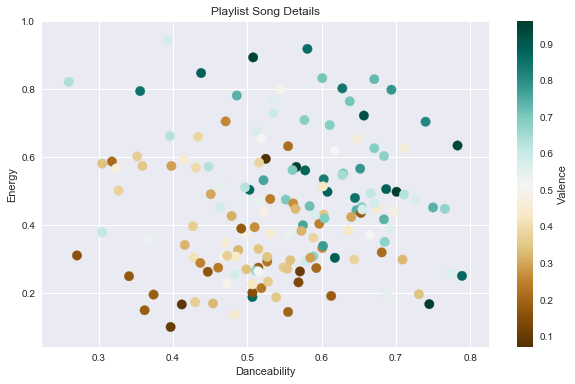

In [93]:
x_var, y_var, c_var = ('Danceability', 'Energy', 'Valence')

f, ax = plt.subplots(figsize=(10,6))
x=plylst_tracks[x_var]
y=plylst_tracks[y_var]
c=plylst_tracks[c_var]
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_title('Playlist Song Details')

points = ax.scatter(x, y, c=c, s=90, cmap='BrBG')
f.colorbar(points, label=c_var)

In [89]:
plylst_tracks.columns

Index(['Artist Followers', 'Artist Genres', 'Artist ID', 'Artist Image',
       'Artist Name', 'Artist Popularity', 'Track ID', 'Track Name',
       'Track Popularity', 'Acousticness', 'Danceability', 'Duration',
       'Energy', 'Instrumentalness', 'Key', 'Liveness', 'Loudness',
       'Major/Minor', 'Speechiness', 'Time Signature', 'Valence'],
      dtype='object')

In [95]:
# tracks = playlist.get_artist_tracks('Tom Waits')
# tracks = playlist.add_audio_features(tracks)
tracks
playlist.create_playlist_of_tracks(tracks,'Mr. Waits')
tracks

,Album ID,Album Name,Artist,Release Date,Track ID,Track Name,Track Popularity,Acousticness,Danceability,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Major/Minor,Speechiness,Time Signature,Valence
0,5kngzyNwERbKiQDvVwsgMt,Bad As Me (Deluxe Edition Remastered),Tom Waits,2011-10-25,6hO08E5432k3NduwLmC4EB,Chicago,39,0.613,0.560,2.241333,0.9550,0.369000,11,0.4470,-6.985,0,0.0676,4,0.7000
1,5kngzyNwERbKiQDvVwsgMt,Bad As Me (Deluxe Edition Remastered),Tom Waits,2011-10-25,4b7HV186C2JMd3B68rXxN4,Raised Right Men,37,0.495,0.611,3.399117,0.8450,0.000000,7,0.1010,-5.473,0,0.0419,3,0.7840
2,5kngzyNwERbKiQDvVwsgMt,Bad As Me (Deluxe Edition Remastered),Tom Waits,2011-10-25,5b4i5arQlnE67Kr2JJha41,Talking At The Same Time,41,0.898,0.388,4.219550,0.4720,0.000044,2,0.1130,-10.287,0,0.0388,3,0.4730
3,5kngzyNwERbKiQDvVwsgMt,Bad As Me (Deluxe Edition Remastered),Tom Waits,2011-10-25,7rXdnwtcQ15JFQIJTF5yQh,Get Lost,35,0.328,0.537,2.706000,0.9620,0.399000,4,0.4170,-5.893,1,0.0731,4,0.8490
4,5kngzyNwERbKiQDvVwsgMt,Bad As Me (Deluxe Edition Remastered),Tom Waits,2011-10-25,6SzSsDcXt276ngrjTX8JP9,Face To The Highway,33,0.948,0.469,3.704217,0.4240,0.001290,2,0.0875,-11.530,0,0.0668,4,0.4390
5,5kngzyNwERbKiQDvVwsgMt,Bad As Me (Deluxe Edition Remastered),Tom Waits,2011-10-25,2QjuqoEWjl3FsjrYHNCa2J,Pay Me,32,0.866,0.308,3.244883,0.3730,0.000043,5,0.2810,-10.389,1,0.0326,3,0.2920
6,5kngzyNwERbKiQDvVwsgMt,Bad As Me (Deluxe Edition Remastered),Tom Waits,2011-10-25,7jMDuSipkmynFJzm3oYiLn,Back In The Crowd,33,0.719,0.604,2.808450,0.4120,0.000672,0,0.1230,-11.396,1,0.0296,4,0.3600
7,5kngzyNwERbKiQDvVwsgMt,Bad As Me (Deluxe Edition Remastered),Tom Waits,2011-10-25,4dmsCy5enq93HdsTyrlL9Z,Bad As Me,40,0.657,0.623,3.173333,0.9490,0.001350,3,0.1680,-3.954,0,0.1130,4,0.3110
8,5kngzyNwERbKiQDvVwsgMt,Bad As Me (Deluxe Edition Remastered),Tom Waits,2011-10-25,7IrH6jsany8MklkMMQUxI1,Kiss Me,33,0.849,0.272,3.681117,0.4360,0.000017,4,0.2230,-9.196,0,0.0523,3,0.1780
9,5kngzyNwERbKiQDvVwsgMt,Bad As Me (Deluxe Edition Remastered),Tom Waits,2011-10-25,2Oce84sHUF4WWqEvCh6Bav,Satisfied,32,0.264,0.642,4.079333,0.8380,0.000038,2,0.1720,-5.601,1,0.1070,4,0.8190
